# Loan Default
Mohamed Bani Hani

---
## Application on the Loan Default Dataset
**Objective:** Predict Loan Default 


In [1]:
#Standard libraries for data analysis:    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [92]:
df = pd.read_csv("Dataset3.csv")

In [93]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,2850,2850,2850.0,36 months,11.83%,94.44,B,B3,5,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.70%,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off
1,20000,20000,19950.0,60 months,17.14%,498.56,E,E3,10,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.20%,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off
2,6000,4500,0.0,36 months,15.70%,157.55,E,E5,1,MORTGAGE,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.20%,19,4836.50,0.00,316,157.55,166,67,0,Charged Off
3,6400,6400,6150.0,60 months,10.59%,137.85,B,B2,10,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.10%,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off
4,1200,1200,1200.0,36 months,13.85%,40.93,C,C4,5,OWN,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.70%,8,501.76,501.76,75,40.93,0,67,0,Charged Off


In [94]:
df.dtypes.sort_values()# this help in detecting the data type for each column 

loan_amnt                   int64
delinq_2yrs                 int64
pub_rec_bankruptcies        int64
mths_since_last_delinq      int64
zip_code                    int64
mths_since_last_record      int64
open_acc                    int64
issue_days                  int64
pub_rec                     int64
earliest_cr_line            int64
revol_bal                   int64
emp_length                  int64
last_pymnt_d                int64
next_pymnt_d                int64
last_credit_pull_d          int64
funded_amnt                 int64
total_acc                   int64
inq_last_6mths              int64
total_pymnt               float64
total_pymnt_inv           float64
last_pymnt_amnt           float64
dti                       float64
annual_inc                float64
installment               float64
funded_amnt_inv           float64
purpose                    object
Credit_requirements        object
verification_status        object
revol_util                 object
home_ownership

In [95]:
rows = df.shape[0]
column = df.shape[1]
print("There are {} rows and {} columns.".format(rows,column))

There are 42535 rows and 36 columns.


In [96]:
df.describe()
# loan_amnt, funded_amnt and funded_amnt_inv  are almost the same 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,issue_days,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,4.913389,6.913656e+04,161.110380,49993.001058,13.373043,0.152345,6432.674997,1.080686,12.850359,5.079346,9.337581,0.058117,1.429786e+04,22.109322,12020.265657,11312.805189,177.374492,2613.245652,11.492136,146.012061,0.043776
std,7410.938391,7146.914675,7131.598014,208.927216,3.461593,6.409635e+04,103.850896,32847.867276,6.726315,0.512247,4452.973017,1.527195,21.663092,21.575844,4.501353,0.245634,2.201844e+04,11.603239,9094.736121,9038.544854,105.494566,4385.066535,51.542611,99.511571,0.205515
min,500.000000,500.000000,0.000000,15.670000,0.000000,1.896000e+03,12.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,2.000000,4.000000e+04,73.000000,20000.000000,8.200000,0.000000,319.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,5465.685189,4793.115000,75.000000,211.050000,0.000000,67.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,4.000000,5.900000e+04,165.000000,44600.000000,13.470000,0.000000,7541.000000,1.000000,0.000000,0.000000,9.000000,0.000000,8.821000e+03,20.000000,9682.251696,8956.080000,167.000000,528.360000,0.000000,102.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,9.000000,8.250000e+04,256.000000,85000.000000,18.680000,0.000000,9153.000000,2.000000,21.000000,0.000000,12.000000,0.000000,1.725100e+04,29.000000,16427.850065,15544.335000,283.000000,3170.220000,0.000000,225.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,10.000000,6.000000e+06,349.000000,99900.000000,29.990000,13.000000,26654.000000,33.000000,120.000000,129.000000,47.000000,5.000000,1.207359e+06,90.000000,58886.473430,58563.680000,350.000000,36115.200000,350.000000,350.000000,2.000000


In [97]:
df.describe(include = 'O')
# problem with int_rate and revol_util(%)

,term,int_rate,grade,sub_grade,home_ownership,verification_status,Credit_requirements,purpose,addr_state,revol_util,loan_status
count,42535,42535,42535,42535,42535,42535,42535,42535,42535,42535,42535
unique,2,394,7,35,5,3,2,14,50,1119,2
top,36 months,10.99%,B,B3,RENT,Not Verified,Yes,debt_consolidation,CA,0.00%,Fully Paid
freq,31534,970,12389,2997,20181,18758,39786,19776,7429,1160,36104


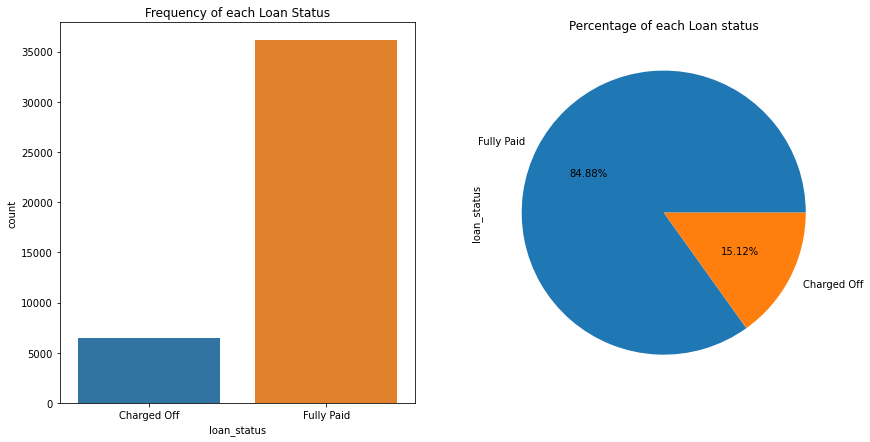

In [8]:
#in order to determine of the dataset is balanced ot unBalanced 
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()


In [98]:
df["int_rate"] = df["int_rate"].apply(lambda x:float(x[:-1]) ) #removing the % 

In [99]:
df["revol_util"] = df["revol_util"].apply(lambda x:float(x[:-1]) ) #removing the % 

In [11]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,2850,2850,2850.0,36 months,11.83,94.44,B,B3,5,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off
1,20000,20000,19950.0,60 months,17.14,498.56,E,E3,10,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off
2,6000,4500,0.0,36 months,15.70,157.55,E,E5,1,MORTGAGE,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,Charged Off
3,6400,6400,6150.0,60 months,10.59,137.85,B,B2,10,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off
4,1200,1200,1200.0,36 months,13.85,40.93,C,C4,5,OWN,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,Charged Off


In [100]:
# to detect which state have the most fully pain and charged off loans
x = pd.crosstab(df.addr_state, df.loan_status,margins=True)

In [101]:
x['ratio'] = x['Fully Paid']/ x['All'] *100

In [14]:
x

loan_status,Charged Off,Fully Paid,All,ratio
addr_state,,,,
AK,17,69,86,80.232558
AL,62,422,484,87.190083
AR,34,227,261,86.973180
AZ,143,790,933,84.673098
CA,1232,6197,7429,83.416341
CO,111,746,857,87.047841
CT,106,710,816,87.009804
DC,17,207,224,92.410714
DE,16,120,136,88.235294


In [15]:
pd.set_option('max_columns', None)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,2850,2850,2850.0,36 months,11.83,94.44,B,B3,5,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off
1,20000,20000,19950.0,60 months,17.14,498.56,E,E3,10,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off
2,6000,4500,0.0,36 months,15.70,157.55,E,E5,1,MORTGAGE,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,Charged Off
3,6400,6400,6150.0,60 months,10.59,137.85,B,B2,10,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off
4,1200,1200,1200.0,36 months,13.85,40.93,C,C4,5,OWN,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,Charged Off


<AxesSubplot:>

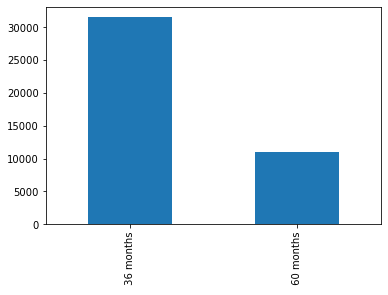

In [16]:
import matplotlib.pyplot as plt

df['term'].value_counts().plot(kind ='bar')

In [17]:
# splitting the dataset based on the factor column to easily detect the pattern in each for each type
dfc = df[(df.loan_status == "Charged Off")]

dff = df[(df.loan_status == "Fully Paid")]

print('There are {} Charged Off and {} Fully Paid.'.format(dfc.shape[0], dff.shape[0]))

There are 6431 Charged Off and 36104 Fully Paid.


Text(0.5, 1.0, 'Fully Paid')

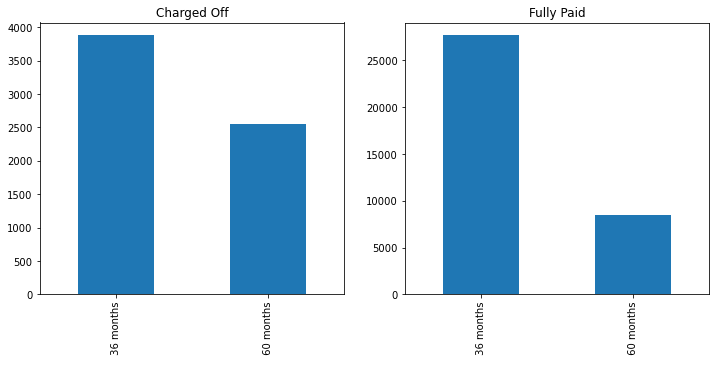

In [18]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['term'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')

ax = fig.add_subplot(122)
dff['term'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')
#most demanded term is 36 month

In [19]:
#after observing the above figure we can determine that loan term do not give any indication for loan defaulting 
#thus using one hot encoding would result in removing any basis in the data
df = pd.get_dummies(df, columns = ['term'])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months
0,2850,2850,2850.0,11.83,94.44,B,B3,5,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off,1,0
1,20000,20000,19950.0,17.14,498.56,E,E3,10,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off,0,1
2,6000,4500,0.0,15.70,157.55,E,E5,1,MORTGAGE,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,Charged Off,1,0
3,6400,6400,6150.0,10.59,137.85,B,B2,10,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off,0,1
4,1200,1200,1200.0,13.85,40.93,C,C4,5,OWN,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,Charged Off,1,0


In [20]:
"""""
term = {' 36 months':0, ' 60 months':1} # i had a problem with the space before the number 36 and 60
# replace sex column with 0/1
df['term'] = df['term'].apply(lambda x: term[x])
# print head to verify
df.head()
"""""

'""\nterm = {\' 36 months\':0, \' 60 months\':1} # i had a problem with the space before the number 36 and 60\n# replace sex column with 0/1\ndf[\'term\'] = df[\'term\'].apply(lambda x: term[x])\n# print head to verify\ndf.head()\n'

Text(0.5, 1.0, 'Fully Paid')

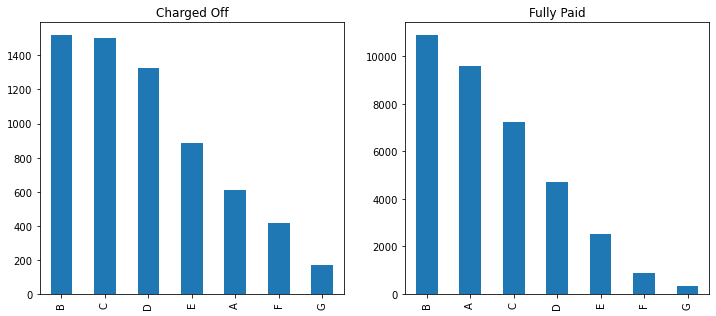

In [21]:
# create the figure
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['grade'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')


ax = fig.add_subplot(122)
dff['grade'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')

In [22]:
# we can use the mean and the Transpose to detect the mean for all numerical feature for each loan grade
df_output = df.groupby('grade').mean().T

In [23]:
df_output.loc[['int_rate','installment','annual_inc','dti']]

grade,A,B,C,D,E,F,G
int_rate,7.342708,11.014209,13.499889,15.577149,17.376768,19.265304,20.451250
installment,255.976318,319.429080,317.827420,353.858813,403.603179,478.282967,507.923145
annual_inc,66728.344921,67915.047804,68177.588568,68261.487146,75892.024558,83062.405772,93055.818184
dti,12.043492,13.392900,13.846410,13.970959,14.175636,14.641453,15.686172


In [24]:
pd.crosstab(df.grade, df.int_rate,margins=True)

int_rate,5.42,5.79,5.99,6.0,6.03,6.17,6.39,6.54,6.62,6.76,6.91,6.92,6.99,7.05,7.12,7.14,7.29,7.37,7.4,7.42,7.43,7.49,7.51,7.66,7.68,7.74,7.75,7.88,7.9,7.91,8.0,8.07,8.32,8.38,8.49,8.59,8.63,8.7,8.88,8.9,8.94,9.01,9.07,9.2,9.25,9.32,9.33,9.38,9.45,9.51,9.62,9.63,9.64,9.67,9.7,9.76,9.83,9.88,9.91,9.96,9.99,10.0,10.01,10.08,10.14,10.2,10.25,10.28,10.33,10.36,10.37,10.38,10.39,10.46,10.51,10.59,10.62,10.64,10.65,10.71,10.74,10.75,10.78,10.83,10.91,10.95,10.96,10.99,11.03,11.09,11.11,11.12,11.14,11.22,11.26,11.28,11.34,11.36,11.41,11.46,11.48,11.49,11.54,11.58,11.59,11.63,11.66,11.71,11.72,11.78,11.83,11.86,11.89,11.91,11.97,11.99,12.04,12.09,12.12,12.17,12.18,12.21,12.22,12.23,12.29,12.36,12.41,12.42,12.49,12.53,12.54,12.61,12.62,12.67,12.68,12.69,12.72,12.73,12.8,12.84,12.86,12.87,12.92,12.98,12.99,13.04,13.06,13.11,13.12,13.16,13.17,13.22,13.23,13.24,13.3,13.35,13.36,13.43,13.47,13.48,13.49,13.55,13.57,13.61,13.62,13.67,13.72,13.75,13.79,13.8,13.84,13.85,13.87,13.92,13.93,13.98,13.99,14.07,14.09,14.11,14.12,14.17,14.18,14.22,14.25,14.26,14.27,14.3,14.35,14.38,14.42,14.43,14.46,14.5,14.54,14.57,14.59,14.61,14.62,14.65,14.67,14.7,14.72,14.74,14.75,14.79,14.82,14.83,14.84,14.88,14.91,14.93,14.96,15.01,15.05,15.07,15.13,15.2,15.21,15.23,15.25,15.27,15.28,15.31,15.33,15.37,15.38,15.45,15.51,15.57,15.58,15.62,15.65,15.68,15.7,15.76,15.83,15.88,15.95,15.96,15.99,16.0,16.01,16.02,16.07,16.08,16.11,16.15,16.2,16.28,16.29,16.32,16.33,16.35,16.4,16.45,16.46,16.49,16.59,16.63,16.65,16.69,16.7,16.71,16.77,16.82,16.83,16.89,16.91,16.95,16.96,17.03,17.04,17.06,17.09,17.14,17.15,17.19,17.22,17.26,17.27,17.28,17.34,17.39,17.41,17.43,17.44,17.46,17.49,17.51,17.54,17.56,17.58,17.59,17.66,17.72,17.74,17.78,17.8,17.86,17.88,17.9,17.91,17.93,17.97,17.99,18.04,18.07,18.09,18.17,18.21,18.25,18.29,18.3,18.36,18.39,18.43,18.49,18.53,18.54,18.61,18.62,18.64,18.67,18.72,18.78,18.79,18.84,18.86,18.91,18.99,19.03,19.04,19.13,19.16,19.29,19.36,19.39,19.41,19.42,19.47,19.66,19.69,19.74,19.79,19.82,19.91,20.03,20.11,20.16,20.17,20.2,20.25,20.3,20.4,20.48,20.52,20.53,20.62,20.69,20.77,20.85,20.86,20.89,20.9,20.99,21.14,21.21,21.22,21.27,21.28,21.36,21.48,21.59,21.64,21.67,21.74,21.82,22.06,22.11,22.35,22.48,22.64,22.74,22.85,22.94,23.13,23.22,23.52,23.59,23.91,24.11,24.4,24.59,All
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,573,410,347,1,447,252,58,307,396,168,310,204,336,23,9,342,397,32,72,7,33,656,787,292,94,154,27,742,582,14,198,26,49,26,445,187,44,0,0,402,299,0,15,0,0,187,0,23,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10183
B,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,168,0,0,17,0,15,141,0,24,0,47,10,195,174,29,7,9,77,11,186,377,30,607,251,8,55,11,18,228,0,9,256,470,227,57,12,22,367,241,5,435,58,312,260,0,31,0,82,15,970,0,0,332,272,215,0,95,0,0,258,0,27,193,837,0,107,0,8,0,609,0,0,243,402,165,0,0,535,0,0,5,0,216,183,0,0,0,0,0,443,0,203,0,0,3,0,0,492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

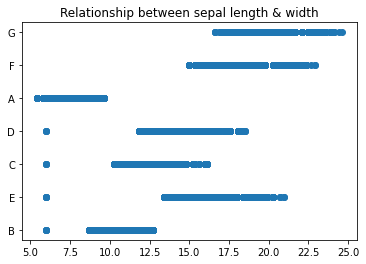

In [25]:
plt.plot( 'int_rate', 'grade', data=df, linestyle='none', marker='o')

plt.title('Relationship between sepal length & width')
plt.show()

In [26]:
df['grade'] = df['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [27]:
df_output1 = df.groupby('sub_grade').mean().T

In [28]:
df_output1.loc[['int_rate','installment','annual_inc','dti']]

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
int_rate,5.808897,6.387855,7.169347,7.665215,8.267214,9.998236,10.486077,10.983310,11.399876,11.770078,12.818061,13.296296,13.596966,13.966825,14.415577,14.730313,15.263966,15.633775,15.955044,16.414882,16.777240,17.091656,17.421647,17.829783,18.329599,18.756020,18.956753,19.465381,19.829052,20.099740,20.390426,20.423178,20.605823,20.566970,20.310698
installment,219.610622,219.975395,234.420450,276.843549,282.803412,295.474166,312.600114,330.195873,320.599699,328.054934,317.692655,322.704701,315.438058,317.036460,313.822765,337.754046,335.433212,354.510968,371.197465,377.177835,387.890011,386.788470,393.282246,417.400036,456.648056,463.895791,472.830292,471.256271,479.593081,534.783377,525.251560,507.384019,501.088608,543.219798,445.829419
annual_inc,67104.746804,66345.872357,66495.210928,66055.598213,67634.502178,64374.019357,67992.114132,70753.769253,68282.129834,66861.604179,70074.754616,68456.106690,67530.292606,65968.662474,67560.623369,65455.903732,68620.435764,67727.543790,68086.787114,71535.376703,72319.664514,73287.265373,74365.906467,76215.584710,88034.654770,79578.107908,82285.871818,85674.158856,77168.657536,97557.369221,81835.127376,90299.382804,85802.564557,106003.076667,106640.520930
dti,10.744650,11.506342,11.991064,12.367015,12.564612,12.794245,13.071992,13.450027,13.682792,13.707371,13.760314,13.744460,13.677473,14.212978,13.995693,13.846078,14.115313,14.050976,13.960693,13.796801,13.881199,14.287459,14.063129,14.369312,14.456353,14.220536,14.570584,15.099915,15.274550,14.284610,14.768227,15.916542,16.404810,15.139293,16.873953


In [29]:
#here i decided to remove the sub_grade column as it shows no big diffrence between it and the garde 
df = df.drop(['sub_grade'], axis = 1)

Text(0.5, 1.0, 'Fully Paid')

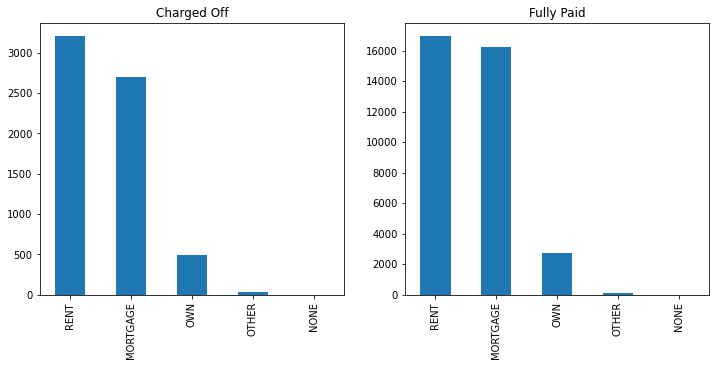

In [30]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['home_ownership'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')


ax = fig.add_subplot(122)
dff['home_ownership'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')

In [31]:
df_output2 = df.groupby('home_ownership').mean().T


In [32]:
df_output2.loc[['int_rate','installment','annual_inc','dti']]

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
int_rate,11.940502,9.13125,12.768088,11.924826,12.411766
installment,356.268010,230.25000,312.934706,299.155863,294.897673
annual_inc,83725.265771,78550.00000,68204.911765,59206.087382,57035.355496
dti,13.317068,6.37125,12.125809,13.293445,13.449632


In [33]:
#one hot encoding
#here i decided to using one hot encodign method as the home_ownership do not affect sigfictly on the loan status 

df = pd.get_dummies(df, columns = ['home_ownership'])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,2850,2850,2850.0,11.83,94.44,6,5,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off,1,0,0,0,0,1,0
1,20000,20000,19950.0,17.14,498.56,3,10,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off,0,1,1,0,0,0,0
2,6000,4500,0.0,15.70,157.55,3,1,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,Charged Off,1,0,1,0,0,0,0
3,6400,6400,6150.0,10.59,137.85,6,10,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off,0,1,1,0,0,0,0
4,1200,1200,1200.0,13.85,40.93,5,5,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,Charged Off,1,0,0,0,0,1,0


In [34]:
#df["home_ownership"] = df["home_ownership"].map({"MORTGAGE":4,"RENT":2,"OWN":3,"OTHER":1,"NONE":5})
#df.head()

Text(0.5, 1.0, 'Fully Paid')

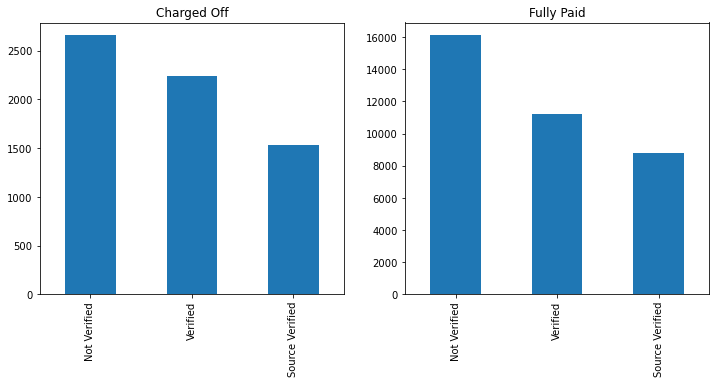

In [35]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['verification_status'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')


ax = fig.add_subplot(122)
dff['verification_status'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')

In [36]:
#here i decided to remove the verification_status. the data do not shows any diffrent between charged off and fully paid customer 

df = df.drop(['verification_status'], axis = 1)

Text(0.5, 1.0, 'Fully Paid')

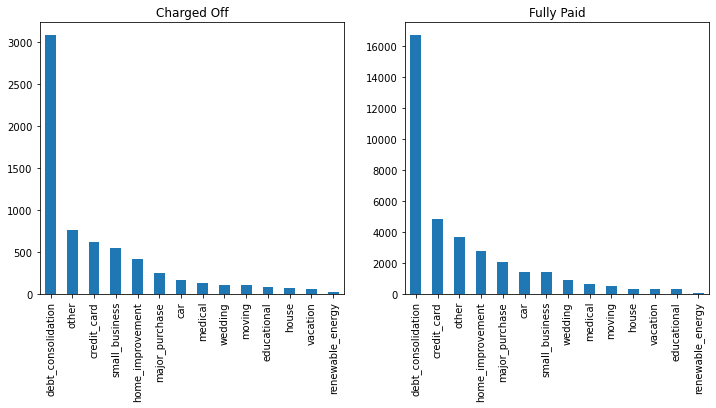

In [37]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['purpose'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')


ax = fig.add_subplot(122)
dff['purpose'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')

# not important  feature 

In [38]:
df_output3 = df.groupby('purpose').mean().T

In [39]:
df_output3.loc[['int_rate','installment','annual_inc','dti']]

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
int_rate,10.651641,11.842494,12.606085,12.121540,11.596121,12.411408,11.013501,11.683519,11.752782,11.985964,11.527925,13.159493,10.951675,12.033974
installment,190.643294,345.723005,364.137555,214.650900,320.787921,360.682676,235.044794,234.802709,195.647774,234.991898,248.291321,393.615261,161.851775,290.539900
annual_inc,61871.866960,70921.585802,67329.009004,51232.925545,89467.775374,74995.596150,65999.279749,68617.111275,60901.877822,63902.043067,85372.364434,77490.378368,59097.086625,68477.692898
dti,11.112601,14.672248,14.551676,11.235498,11.276080,10.591009,10.861411,12.423400,11.687091,12.359046,12.010094,11.235994,12.198275,12.337032


In [40]:
pd.crosstab(df.purpose, df.loan_status,margins=True)

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,173,1442,1615
credit_card,617,4860,5477
debt_consolidation,3084,16692,19776
educational,88,334,422
home_improvement,422,2777,3199
house,70,356,426
major_purchase,245,2066,2311
medical,128,625,753
moving,107,522,629


Text(0.5, 1.0, 'Fully Paid')

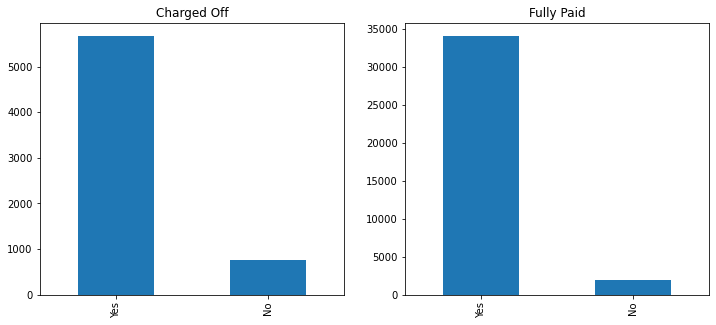

In [41]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
dfc['Credit_requirements'].value_counts().plot(kind ='bar')
ax.set_title('Charged Off')


ax = fig.add_subplot(122)
dff['Credit_requirements'].value_counts().plot(kind ='bar')
ax.set_title('Fully Paid')

In [42]:
df = df.drop(['purpose', 'Credit_requirements','addr_state','zip_code'], axis = 1)

In [43]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,2850,2850,2850.0,11.83,94.44,6,5,24000.0,347,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off,1,0,0,0,0,1,0
1,20000,20000,19950.0,17.14,498.56,3,10,48012.0,256,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off,0,1,1,0,0,0,0
2,6000,4500,0.0,15.70,157.55,3,1,42450.0,137,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,Charged Off,1,0,1,0,0,0,0
3,6400,6400,6150.0,10.59,137.85,6,10,37000.0,226,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off,0,1,1,0,0,0,0
4,1200,1200,1200.0,13.85,40.93,5,5,60000.0,316,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,Charged Off,1,0,0,0,0,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                42535 non-null  int64  
 1   funded_amnt              42535 non-null  int64  
 2   funded_amnt_inv          42535 non-null  float64
 3   int_rate                 42535 non-null  float64
 4   installment              42535 non-null  float64
 5   grade                    42535 non-null  int64  
 6   emp_length               42535 non-null  int64  
 7   annual_inc               42531 non-null  float64
 8   issue_days               42535 non-null  int64  
 9   dti                      42535 non-null  float64
 10  delinq_2yrs              42535 non-null  int64  
 11  earliest_cr_line         42535 non-null  int64  
 12  inq_last_6mths           42535 non-null  int64  
 13  mths_since_last_delinq   42535 non-null  int64  
 14  mths_since_last_record

In [45]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
emp_length                 0
annual_inc                 4
issue_days                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_d               0
last_pymnt_amnt            0
next_pymnt_d               0
last_credit_pull_d         0
pub_rec_bankruptcies       0
loan_status                0
term_ 36 months            0
term_ 60 months            0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership

In [46]:
## filling the 4 missing values in annual_inc with zeros as i can not assume the income nor can i add fill it with the average
df = df.fillna(0)

In [47]:
cateogry_columns= df.select_dtypes(include=['object']).columns.tolist()
integer_columns= df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [48]:
# lable encoding the factor column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [49]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,2850,2850,2850.0,11.83,94.44,6,5,24000.0,347,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,0,1,0,0,0,0,1,0
1,20000,20000,19950.0,17.14,498.56,3,10,48012.0,256,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,0,0,1,1,0,0,0,0
2,6000,4500,0.0,15.70,157.55,3,1,42450.0,137,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,0,1,0,1,0,0,0,0
3,6400,6400,6150.0,10.59,137.85,6,10,37000.0,226,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,0,0,1,1,0,0,0,0
4,1200,1200,1200.0,13.85,40.93,5,5,60000.0,316,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,0,1,0,0,0,0,1,0


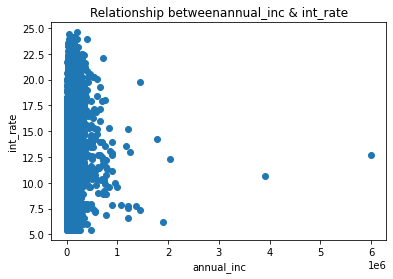

In [50]:
# as we can see here the graph is not presenting the clear view on the Relationship
plt.plot( 'annual_inc', 'int_rate', data=df, linestyle='none', marker='o')
plt.xlabel('annual_inc')
plt.ylabel('int_rate')
plt.title('Relationship between annual_inc & int_rate')
plt.show()

<AxesSubplot:>

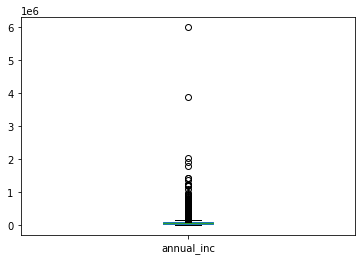

In [51]:
# checking and removing outlier would help in the above problem
df.boxplot( column =['annual_inc'], grid = False)

<AxesSubplot:title={'center':'annual_inc'}, xlabel='loan_status'>

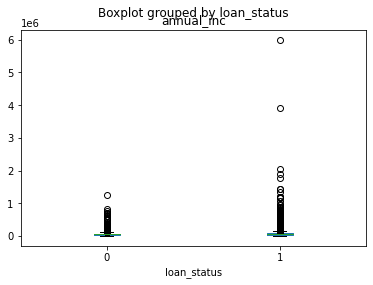

In [52]:
df.boxplot(by ='loan_status', column =['annual_inc'], grid = False)

In [53]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['annual_inc'] >= Q1 - 1.5 * IQR) & (df['annual_inc'] <= Q3 + 1.5 *IQR)
df.loc[filter]  

df = pd.DataFrame(df.loc[filter])

<AxesSubplot:title={'center':'annual_inc'}, xlabel='loan_status'>

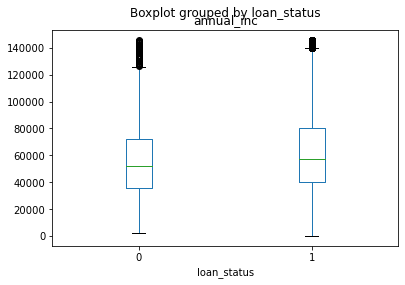

In [54]:
df.boxplot(by ='loan_status', column =['annual_inc'], grid = False)
#df.boxplot( column =['annual_inc'], grid = False)


<AxesSubplot:>

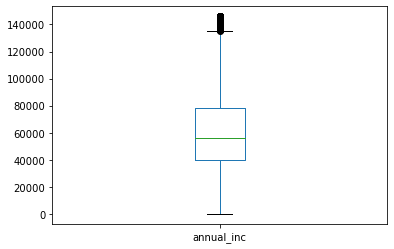

In [55]:
df.boxplot( column =['annual_inc'], grid = False)


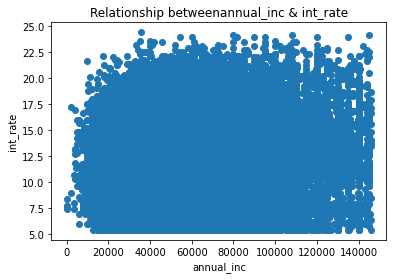

In [56]:
# checking agin the the Relationship between annual_inc & int_rate after removing the outliers

plt.plot( 'annual_inc', 'int_rate', data=df, linestyle='none', marker='o')
plt.xlabel('annual_inc')
plt.ylabel('int_rate')
plt.title('Relationship betweenannual_inc & int_rate')
plt.show()

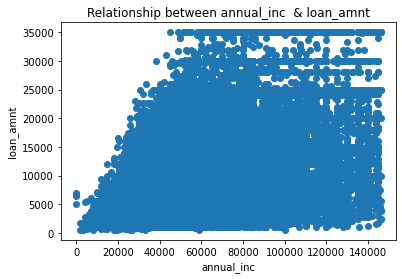

In [57]:
# here i wanted to see of there is any correlation between annual_inc and loan_amnt
plt.plot( 'annual_inc', 'loan_amnt', data=df, linestyle='none', marker='o')
plt.xlabel('annual_inc')
plt.ylabel('loan_amnt')
plt.title('Relationship between annual_inc  & loan_amnt')
plt.show()

In [58]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000
mean,10733.827124,10482.814853,9830.428246,12.115187,312.254627,5.347974,4.869220,61177.734708,161.303039,13.534580,0.150853,6300.599412,1.068439,12.840086,5.200652,9.220823,0.059354,12939.009012,48.935634,21.686813,11609.108124,10929.966927,177.216009,2511.568686,11.217762,146.067625,0.044861,0.847592,0.743377,0.256623,0.432610,0.000198,0.003210,0.076933,0.487050
std,7128.501067,6875.559305,6860.047823,3.683221,199.917374,1.425773,3.451378,28327.114218,103.917979,6.716453,0.508684,4456.936669,1.510586,21.672273,21.823666,4.435662,0.247516,16592.047779,28.334152,11.388271,8713.196504,8658.155110,105.465714,4213.640243,50.993046,99.512618,0.207834,0.359421,0.436775,0.436775,0.495444,0.014053,0.056563,0.266488,0.499838
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4830.610114,9.620000,162.870000,4.000000,2.000000,40000.000000,73.000000,8.400000,0.000000,296.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3522.500000,25.600000,13.000000,5363.718102,4690.465000,75.000000,205.940000,0.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9250.000000,9000.000000,8116.561887,11.990000,270.480000,6.000000,4.000000,56000.000000,165.000000,13.680000,0.000000,7449.000000,1.000000,0.000000,0.000000,8.000000,0.000000,8555.000000,49.500000,20.000000,9381.609121,8721.220000,167.000000,511.790000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,14400.000000,13695.544050,14.650000,410.750000,6.000000,8.000000,78000.000000,256.000000,18.850000,0.000000,9091.000000,2.000000,21.000000,0.000000,12.000000,0.000000,16429.000000,72.400000,28.000000,15776.923555,14970.830000,283.000000,3053.645000,0.000000,225.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,7.000000,10.000000,146000.000000,349.000000,29.990000,13.000000,26654.000000,33.000000,120.000000,129.000000,44.000000,5.000000,487589.000000,119.000000,90.000000,58886.473430,58563.680000,350.000000,36115.200000,350.000000,350.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# creating 4 bins for the annual icome to be able to view it in a categorical way with the loan status 
bins=[0, 40000, 60000, 78000,146000]
group=['Low','Average','High', 'Very high']
df['income PK']= pd.cut(df['annual_inc'], bins, labels=group)

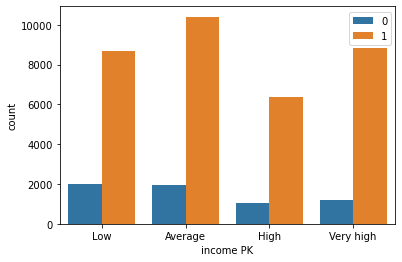

In [60]:
sns.countplot(x="income PK",hue = 'loan_status',data = df)
plt.legend(bbox_to_anchor=(0.86, 0.98), loc=2, borderaxespad=0.1)

In [61]:
bins=[0, 5000, 10000, 15000,35000]
group=['Low','Average','High', 'Very high']
df['loan PK']= pd.cut(df['loan_amnt'], bins, labels=group)
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income PK,loan PK
42529,1400,1400,475.0,10.91,45.78,5,1,40000.0,199,8.61,0,0,0,0,0,0,0,0,0.0,0,1663.240931,564.31,167,1.78,136,101,0,1,1,0,0,0,0,0,1,Low,Low
42531,1200,1200,500.0,9.01,38.17,6,1,36000.0,199,3.27,0,0,0,0,0,0,0,0,0.0,0,1373.990771,572.50,167,39.05,167,67,0,1,1,0,0,0,0,0,1,Low,Low
42532,1275,1275,0.0,12.49,42.65,4,1,40000.0,199,10.00,0,0,0,0,0,0,0,0,0.0,0,1341.960000,0.00,230,42.65,16,67,0,0,1,0,0,0,0,0,1,Low,Low
42533,6500,6500,0.0,9.64,208.66,6,1,20000.0,199,10.00,0,0,0,0,0,0,0,0,0.0,0,7193.060000,0.00,230,208.65,16,67,0,0,1,0,0,0,0,0,1,Low,Average
42534,4350,4350,825.0,8.07,136.45,7,1,120000.0,138,4.00,0,0,0,0,0,0,0,0,0.0,0,4911.992738,931.59,136,139.93,105,0,0,1,1,0,0,0,0,0,1,Very high,Low


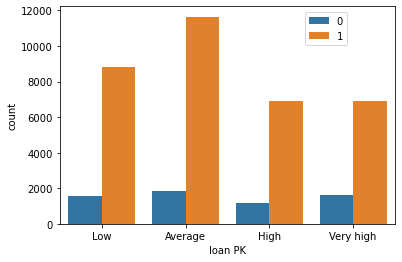

In [62]:
sns.countplot(x="loan PK",hue = 'loan_status',data = df)
plt.legend(bbox_to_anchor=(0.86, 0.98), loc=1, borderaxespad=0.1)

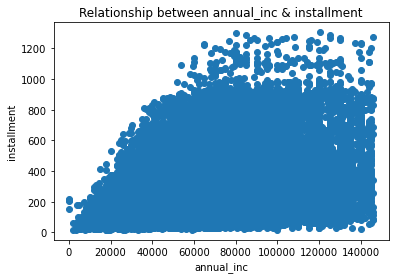

In [63]:
#Basic plot
plt.plot( 'annual_inc', 'installment', data=df, linestyle='none', marker='o')
plt.xlabel('annual_inc')
plt.ylabel('installment')
plt.title('Relationship between annual_inc & installment')
plt.show()

<AxesSubplot:xlabel='dti', ylabel='Count'>

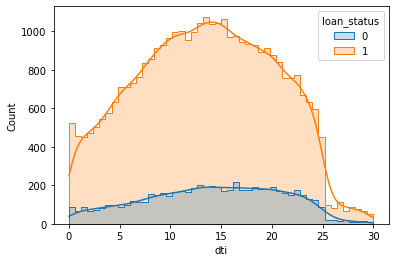

In [64]:
sns.histplot(data=df, x="dti", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='total_pymnt', ylabel='Count'>

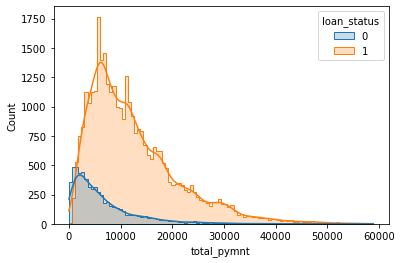

In [65]:
sns.histplot(data=df, x="total_pymnt", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='issue_days', ylabel='Count'>

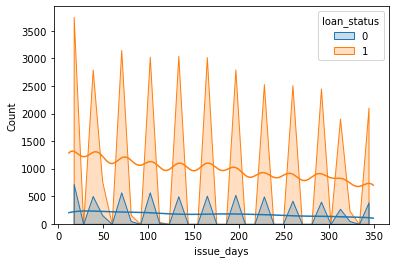

In [66]:
sns.histplot(data=df, x="issue_days", kde=True,hue = 'loan_status',element="poly")

<AxesSubplot:xlabel='last_credit_pull_d', ylabel='Count'>

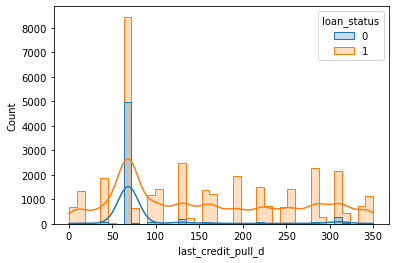

In [67]:
sns.histplot(data=df, x="last_credit_pull_d", kde=True,hue = 'loan_status',element="step")
# ['bars', 'step', 'poly']

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Count'>

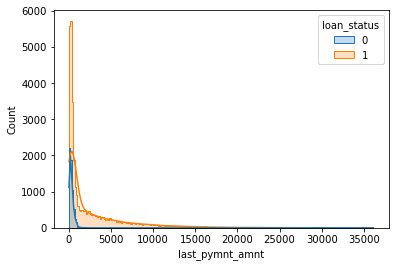

In [68]:
sns.histplot(data=df, x="last_pymnt_amnt", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

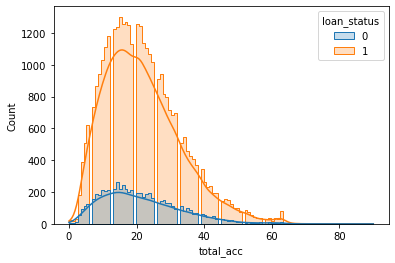

In [69]:
sns.histplot(data=df, x="total_acc", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

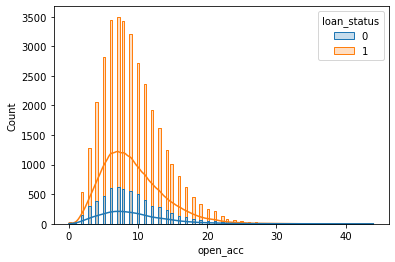

In [70]:
sns.histplot(data=df, x="open_acc", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

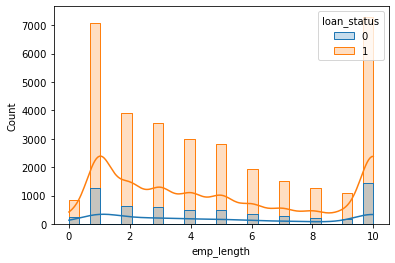

In [71]:
sns.histplot(data=df, x="emp_length", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='installment', ylabel='Count'>

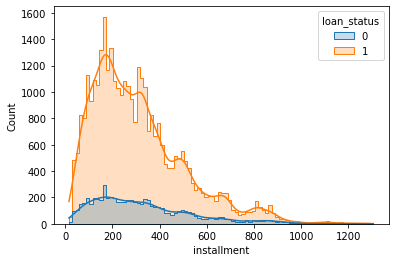

In [72]:
sns.histplot(data=df, x="installment", kde=True,hue = 'loan_status',element="step")

<AxesSubplot:xlabel='last_pymnt_d', ylabel='last_pymnt_amnt'>

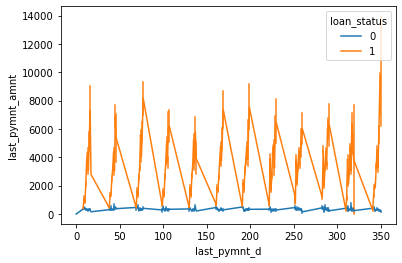

In [73]:
sns.lineplot(data=df, x="last_pymnt_d", y="last_pymnt_amnt", hue="loan_status",markers=True, dashes=False,err_style="bars", ci=68)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='last_pymnt_amnt'>

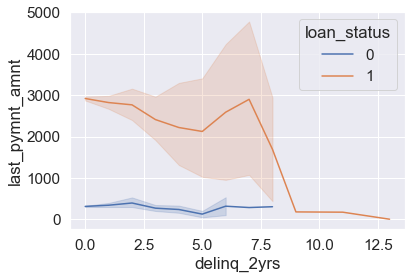

In [522]:
sns.lineplot(data=df, x="delinq_2yrs", y="last_pymnt_amnt", hue="loan_status")

In [75]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000,40503.000000
mean,10733.827124,10482.814853,9830.428246,12.115187,312.254627,5.347974,4.869220,61177.734708,161.303039,13.534580,0.150853,6300.599412,1.068439,12.840086,5.200652,9.220823,0.059354,12939.009012,48.935634,21.686813,11609.108124,10929.966927,177.216009,2511.568686,11.217762,146.067625,0.044861,0.847592,0.743377,0.256623,0.432610,0.000198,0.003210,0.076933,0.487050
std,7128.501067,6875.559305,6860.047823,3.683221,199.917374,1.425773,3.451378,28327.114218,103.917979,6.716453,0.508684,4456.936669,1.510586,21.672273,21.823666,4.435662,0.247516,16592.047779,28.334152,11.388271,8713.196504,8658.155110,105.465714,4213.640243,50.993046,99.512618,0.207834,0.359421,0.436775,0.436775,0.495444,0.014053,0.056563,0.266488,0.499838
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4830.610114,9.620000,162.870000,4.000000,2.000000,40000.000000,73.000000,8.400000,0.000000,296.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3522.500000,25.600000,13.000000,5363.718102,4690.465000,75.000000,205.940000,0.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9250.000000,9000.000000,8116.561887,11.990000,270.480000,6.000000,4.000000,56000.000000,165.000000,13.680000,0.000000,7449.000000,1.000000,0.000000,0.000000,8.000000,0.000000,8555.000000,49.500000,20.000000,9381.609121,8721.220000,167.000000,511.790000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,14400.000000,13695.544050,14.650000,410.750000,6.000000,8.000000,78000.000000,256.000000,18.850000,0.000000,9091.000000,2.000000,21.000000,0.000000,12.000000,0.000000,16429.000000,72.400000,28.000000,15776.923555,14970.830000,283.000000,3053.645000,0.000000,225.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,7.000000,10.000000,146000.000000,349.000000,29.990000,13.000000,26654.000000,33.000000,120.000000,129.000000,44.000000,5.000000,487589.000000,119.000000,90.000000,58886.473430,58563.680000,350.000000,36115.200000,350.000000,350.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
bins=[0, 8.4, 13.68, 18.85,29.99]
group=['Low','Average','High', 'Very high']
df['dti PK']= pd.cut(df['dti'], bins, labels=group)
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income PK,loan PK,dti PK
42529,1400,1400,475.0,10.91,45.78,5,1,40000.0,199,8.61,0,0,0,0,0,0,0,0,0.0,0,1663.240931,564.31,167,1.78,136,101,0,1,1,0,0,0,0,0,1,Low,Low,Average
42531,1200,1200,500.0,9.01,38.17,6,1,36000.0,199,3.27,0,0,0,0,0,0,0,0,0.0,0,1373.990771,572.50,167,39.05,167,67,0,1,1,0,0,0,0,0,1,Low,Low,Low
42532,1275,1275,0.0,12.49,42.65,4,1,40000.0,199,10.00,0,0,0,0,0,0,0,0,0.0,0,1341.960000,0.00,230,42.65,16,67,0,0,1,0,0,0,0,0,1,Low,Low,Average
42533,6500,6500,0.0,9.64,208.66,6,1,20000.0,199,10.00,0,0,0,0,0,0,0,0,0.0,0,7193.060000,0.00,230,208.65,16,67,0,0,1,0,0,0,0,0,1,Low,Average,Average
42534,4350,4350,825.0,8.07,136.45,7,1,120000.0,138,4.00,0,0,0,0,0,0,0,0,0.0,0,4911.992738,931.59,136,139.93,105,0,0,1,1,0,0,0,0,0,1,Very high,Low,Low


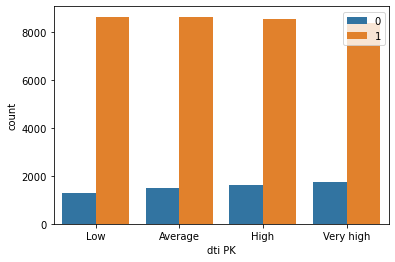

In [77]:
sns.countplot(x="dti PK",hue = 'loan_status',data = df)
plt.legend(bbox_to_anchor=(0.86, 0.98), loc=2, borderaxespad=0.1)

<AxesSubplot:xlabel='annual_inc', ylabel='total_acc'>

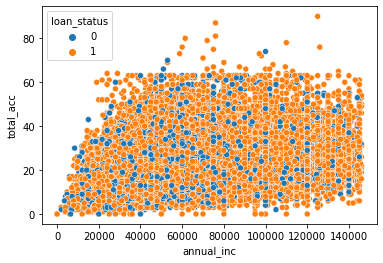

In [79]:
sns.scatterplot(data=df, x="annual_inc", y="total_acc", hue="loan_status")


<AxesSubplot:xlabel='annual_inc', ylabel='open_acc'>

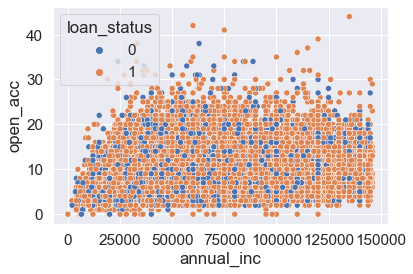

In [329]:
sns.scatterplot(data=df, x="annual_inc", y="open_acc", hue="loan_status")

In [80]:
col = "loan_status"
df1 = df.loc[:, df.columns != col]

df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income PK,loan PK,dti PK
0,2850,2850,2850.0,11.83,94.44,6,5,24000.0,347,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,1,0,0,0,0,1,0,Low,Low,Very high
1,20000,20000,19950.0,17.14,498.56,3,10,48012.0,256,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,0,1,1,0,0,0,0,Average,Very high,High
2,6000,4500,0.0,15.70,157.55,3,1,42450.0,137,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,1,0,1,0,0,0,0,Average,Average,Very high
3,6400,6400,6150.0,10.59,137.85,6,10,37000.0,226,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,0,1,1,0,0,0,0,Low,Average,High
4,1200,1200,1200.0,13.85,40.93,5,5,60000.0,316,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,1,0,0,0,0,1,0,Average,Low,Low


Text(0.5, 1.0, 'Correlation with Loan Status \n')

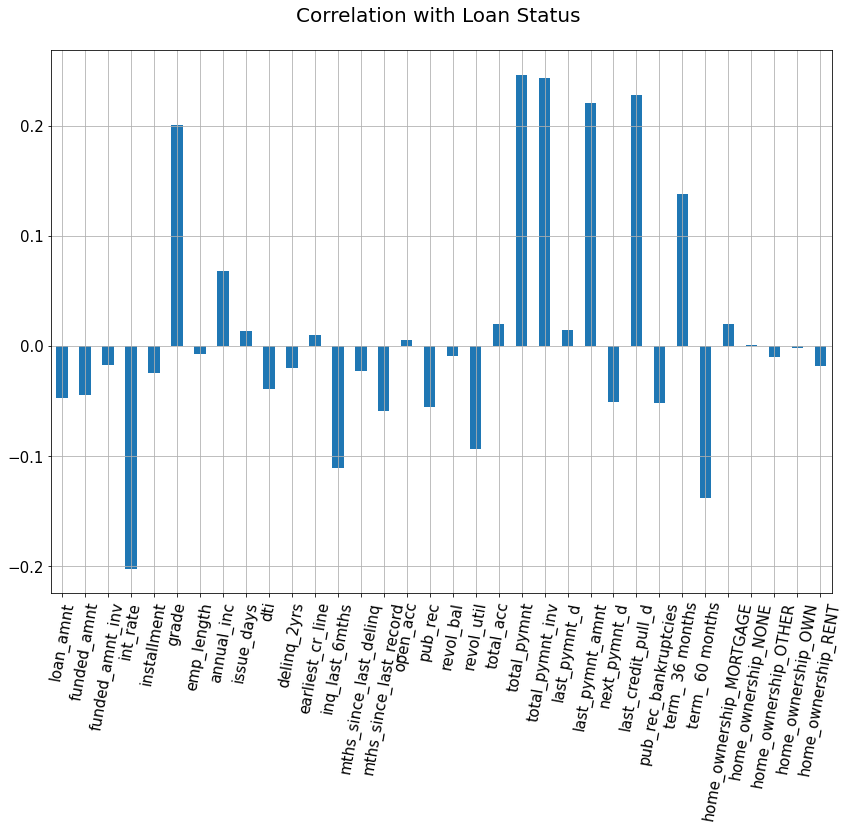

In [81]:
correlations = df1.corrwith(df.loan_status)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (14, 10), 
        fontsize = 15, 
        rot = 80, grid = True)
plt.title('Correlation with Loan Status \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "20", fontfamily = "sans-serif")

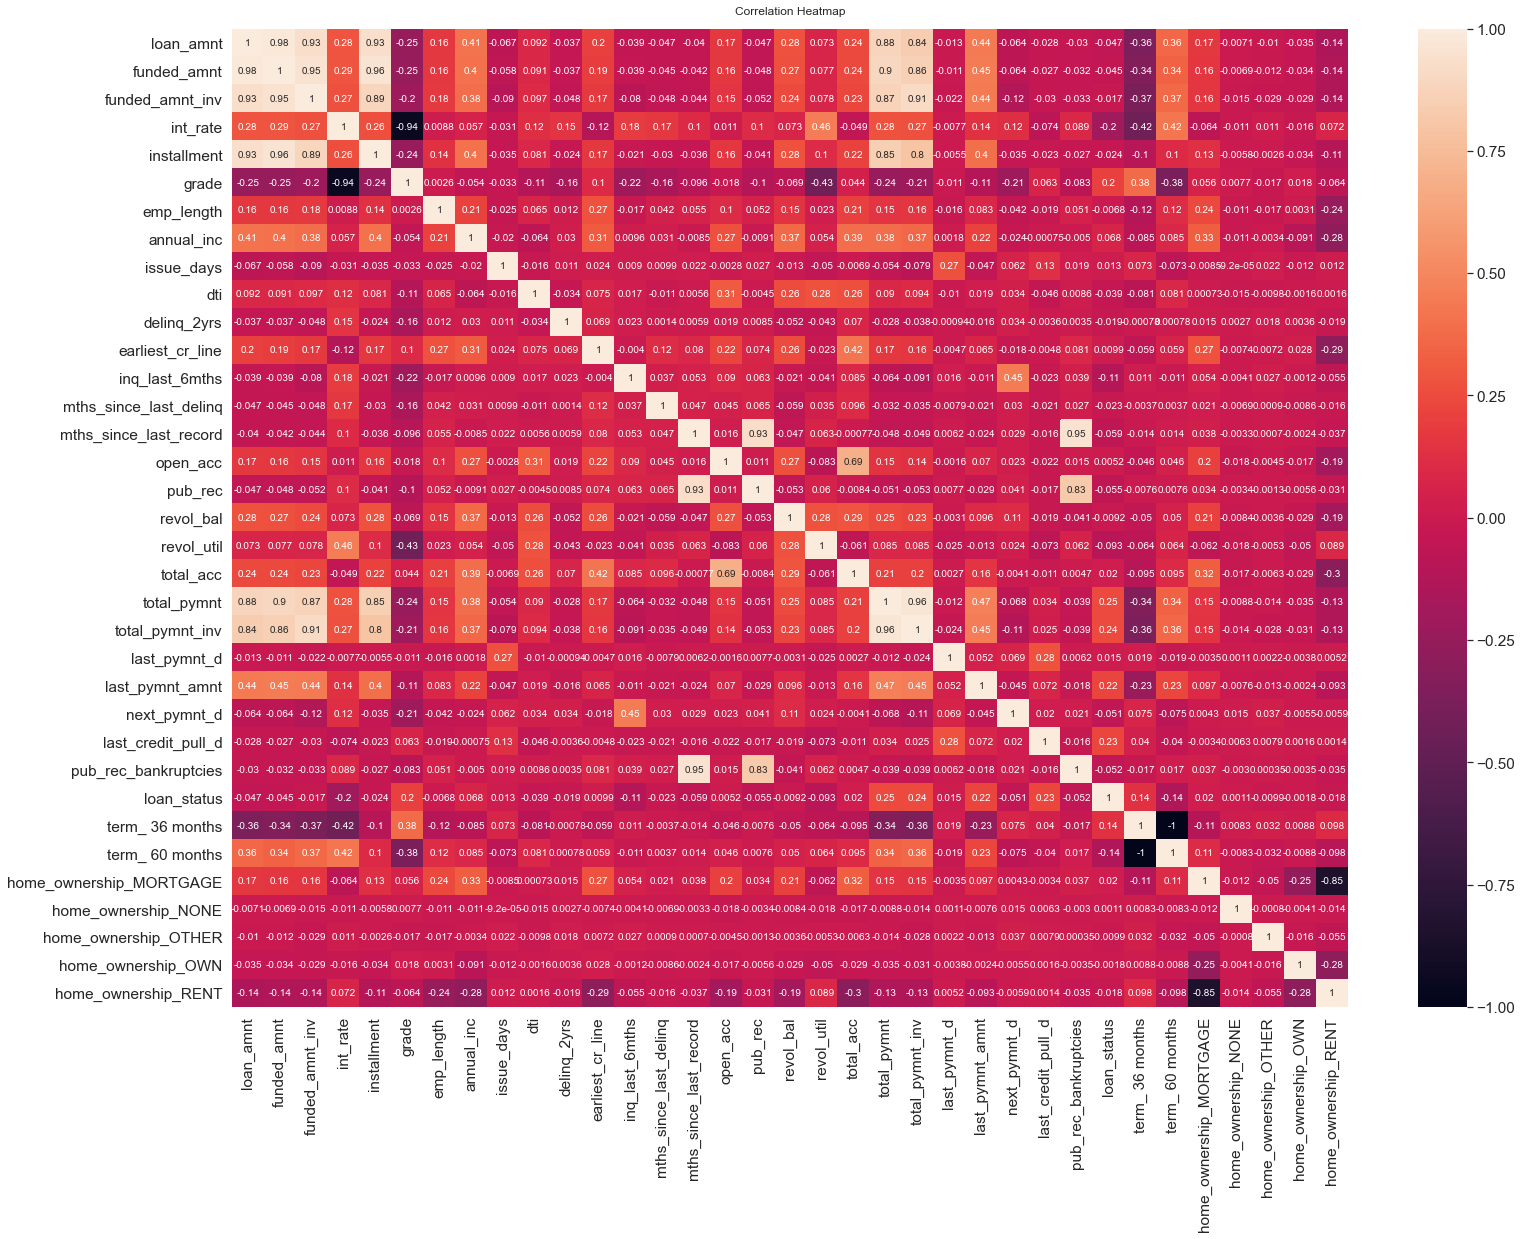

In [333]:
# in this step i wanted to see the correlation between all the featuers 
# this would help in detecting hight correlation that could be removed from the dataset 
plt.figure(figsize=(25, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

In [82]:
# removing funded_amnt and funded_amnt_inv as they have a correlation with loan amount more than 95
df = df.drop(['funded_amnt','funded_amnt_inv'], axis = 1)

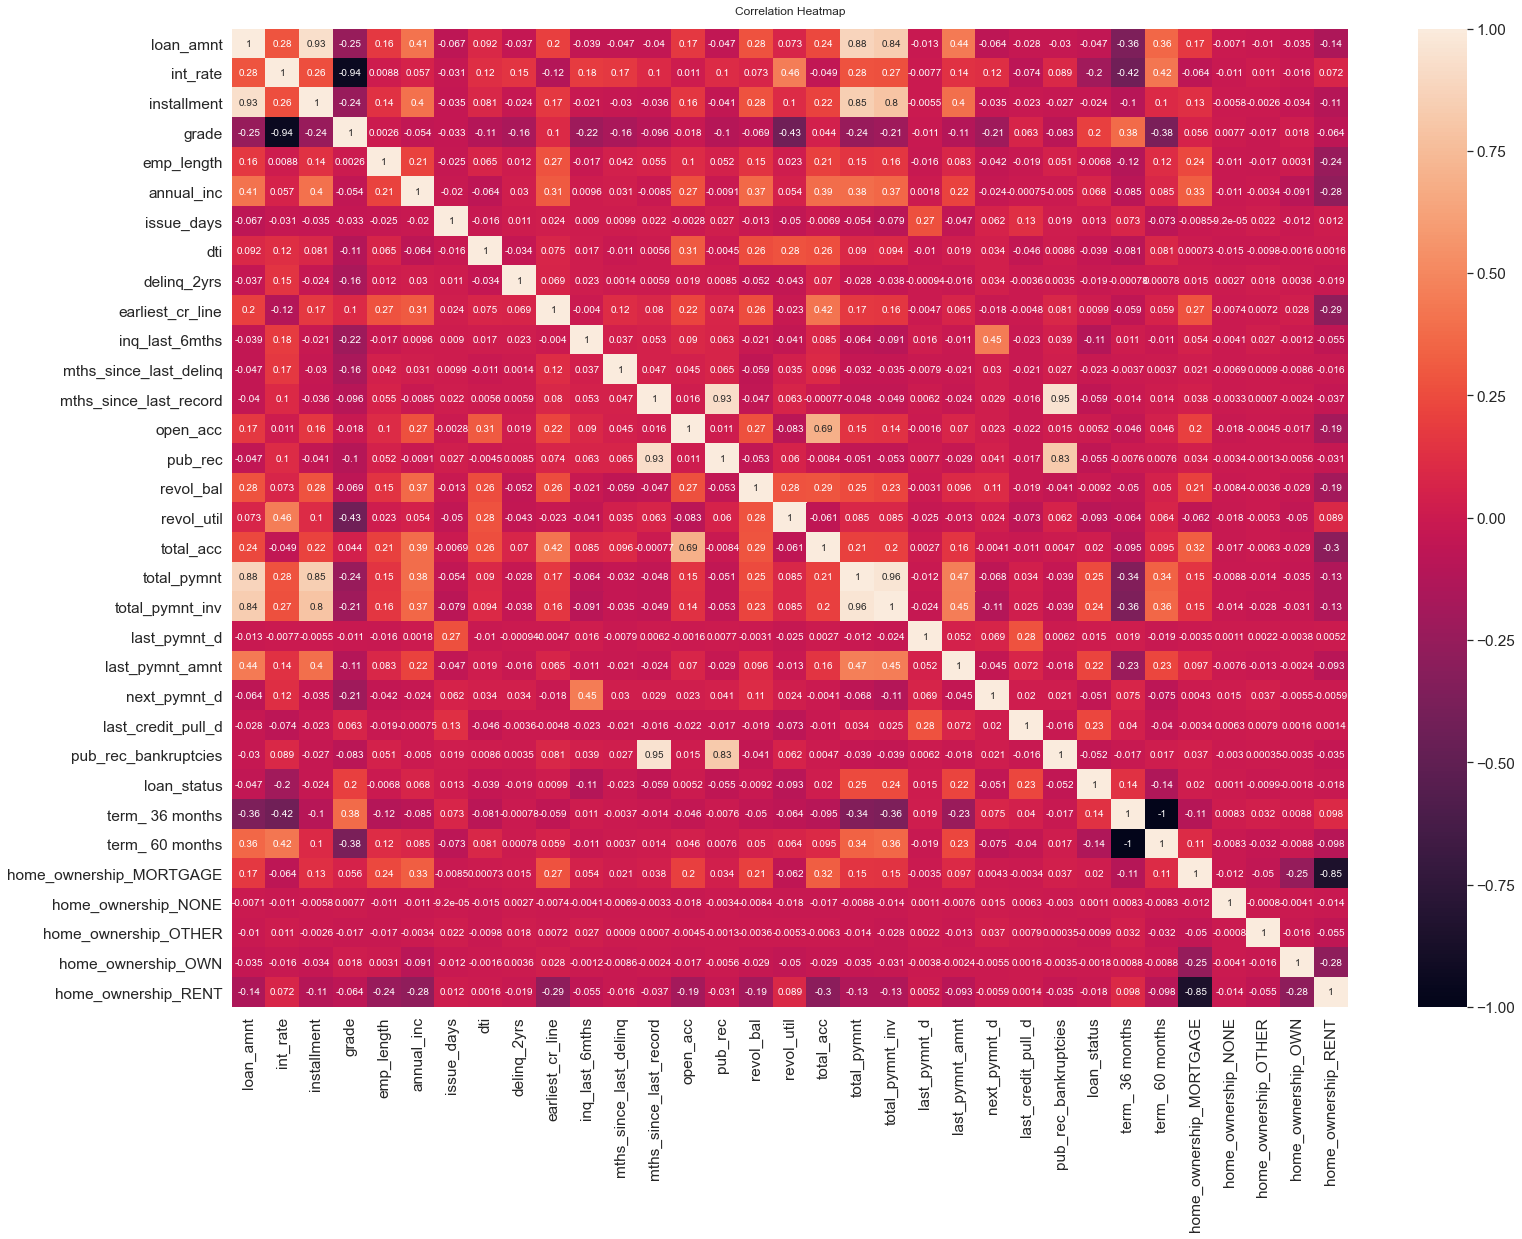

In [335]:
plt.figure(figsize=(25, 18))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

In [83]:
# removing mths_since_last_record as it  have a correlation with public rec bankruptices
# removing total_pymnt_inv as it  have a correlation with total paid

df = df.drop(['mths_since_last_record','total_pymnt_inv'], axis = 1)

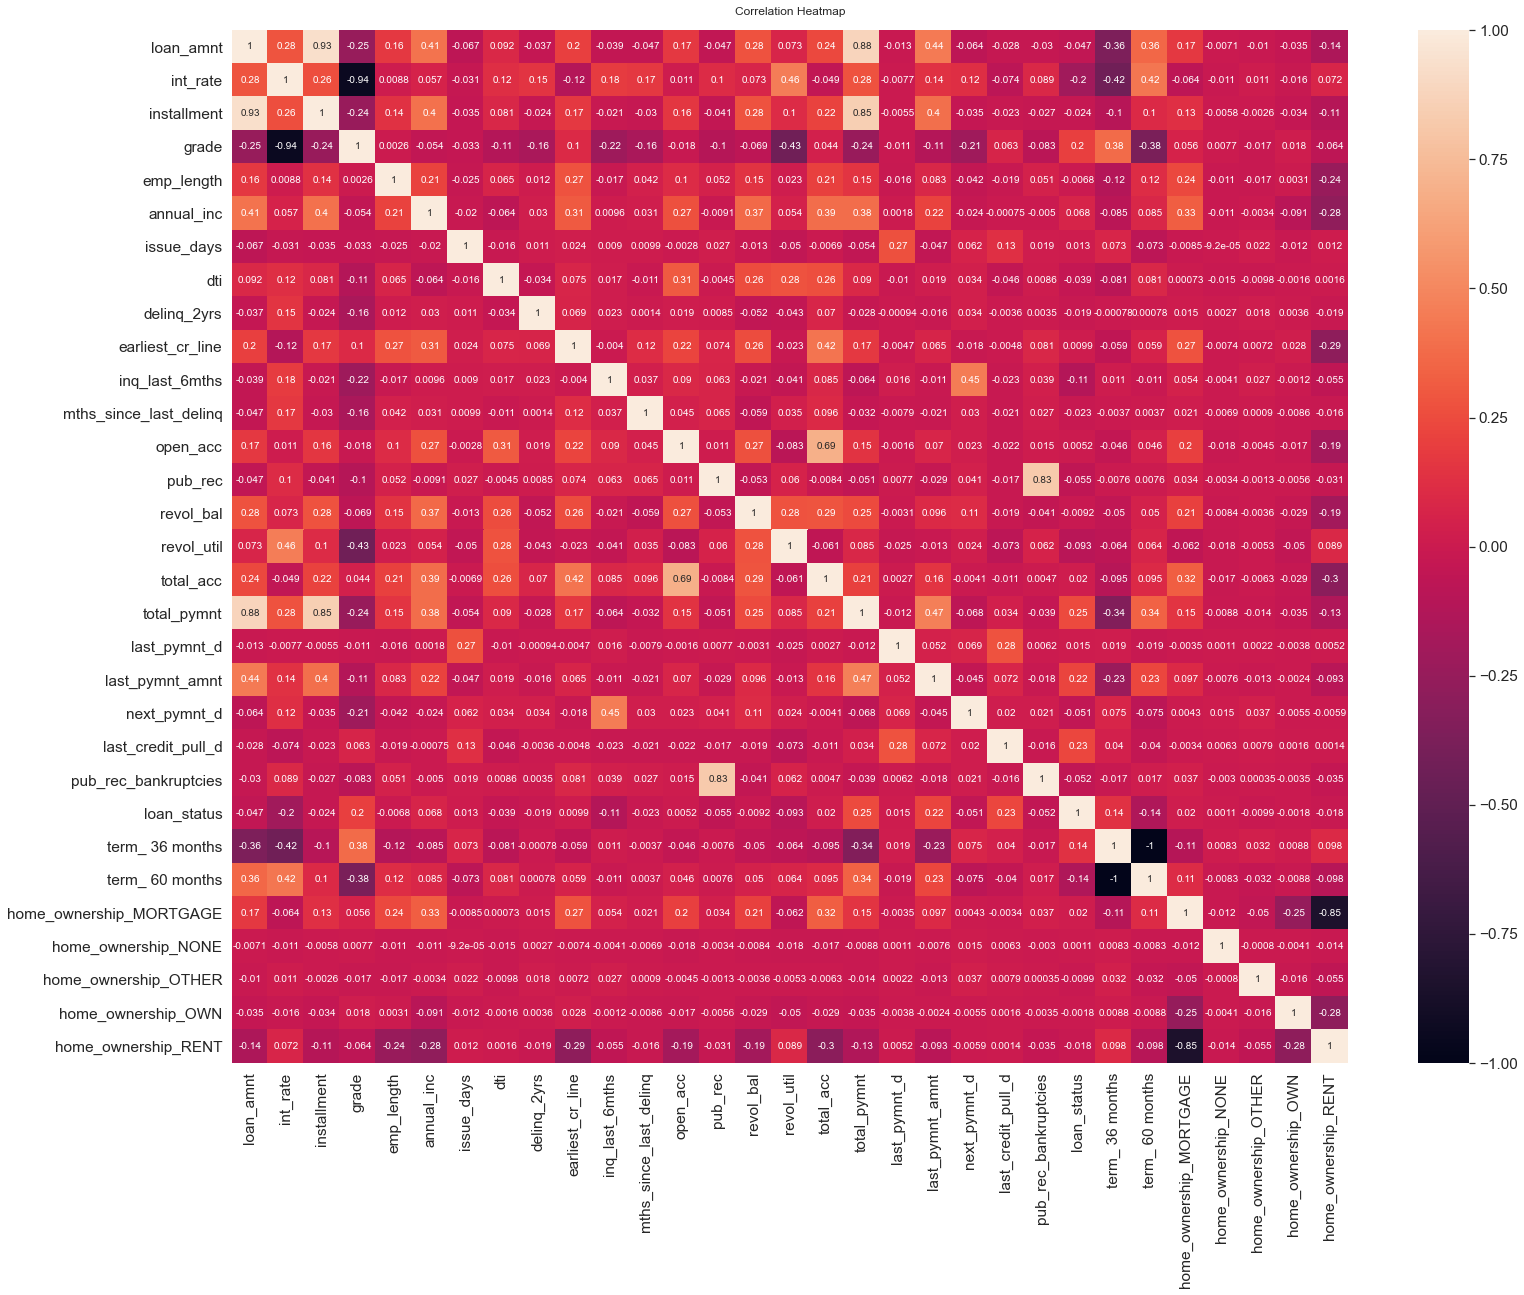

In [338]:
plt.figure(figsize=(25, 19))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15);

In [84]:
# dropping the column which was created by me 
df = df.drop(['income PK','loan PK',"dti PK"], axis = 1)

In [85]:
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,2850,11.83,94.44,6,5,24000.0,347,24.70,0,6718,2,0,5,0,4184,38.7,6,3228.32,314,51.00,0,128,0,0,1,0,0,0,0,1,0
1,20000,17.14,498.56,3,10,48012.0,256,13.82,2,11528,0,13,13,0,14890,66.2,36,29710.84,283,498.56,0,128,0,0,0,1,1,0,0,0,0
2,6000,15.70,157.55,3,1,42450.0,137,23.89,0,112,12,58,15,0,5361,42.2,19,4836.50,316,157.55,166,67,0,0,1,0,1,0,0,0,0
3,6400,10.59,137.85,6,10,37000.0,226,15.70,0,7630,0,0,9,0,8254,48.1,17,7306.05,39,137.85,0,67,0,0,0,1,1,0,0,0,0
4,1200,13.85,40.93,5,5,60000.0,316,3.08,0,17,3,0,3,0,2823,65.7,8,501.76,75,40.93,0,67,0,0,1,0,0,0,0,1,0


In [86]:
rows = df.shape[0]
column = df.shape[1]
print("There are {} rows and {} columns.".format(rows,column))
#There are 42535 rows and 36 columns.before 

There are 40503 rows and 31 columns.


In [87]:
# spliting the dataset into featues and factor 
X = df.loc[:,df.columns !='loan_status']
y = df["loan_status"]

In [88]:
#using SMOTE method to solve unbalaned problem 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(X, y)

(array([34330.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34330.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

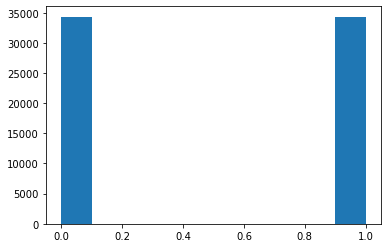

In [89]:
plt.hist(y_new)

In [90]:
#spliting the data for taring and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_new, test_size=0.3, random_state=0)

In [91]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (48062, 30)
Number transactions y_train dataset:  (48062,)
Number transactions X_test dataset:  (20598, 30)
Number transactions y_test dataset:  (20598,)


In [90]:
# train the models using default parameters
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
#models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=2)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                             round(cv_auc_results.mean()*100, 2),
                             round(cv_auc_results.std()*100, 2),
                             round(cv_acc_results.mean()*100, 2),
                             round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
4,Random Forest,99.73,0.02,97.74,0.05
0,Logistic Regression,98.19,0.03,94.20,0.10
3,Decision Tree Classifier,96.20,0.23,96.20,0.23
1,KNN,96.18,0.03,89.83,0.18
2,Gaussian NB,91.19,0.03,80.06,0.24


In [91]:
# test the model 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])



classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
4         Random Forest  0.984707   0.979024  0.990557  0.984757  0.988229
3         Decision Tree  0.973590   0.975836  0.971086  0.973456  0.972033
2            Naive Byes  0.807214   0.924538  0.667932  0.775561  0.707188
0   Logistic Regression  0.934120   0.921832  0.948306  0.934882  0.942890
1  K-Nearest Neighbours  0.893339   0.918264  0.862928  0.889737  0.873455


In [ ]:
# here i decided to focus on LG and DT

In [101]:
#create a function for drawing the tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=df.columns,
                       class_names=['Charge off', "Fully paid"],
                       filled=True)

In [97]:
#building a function for evaluating the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [102]:
#start with 3 max depth
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

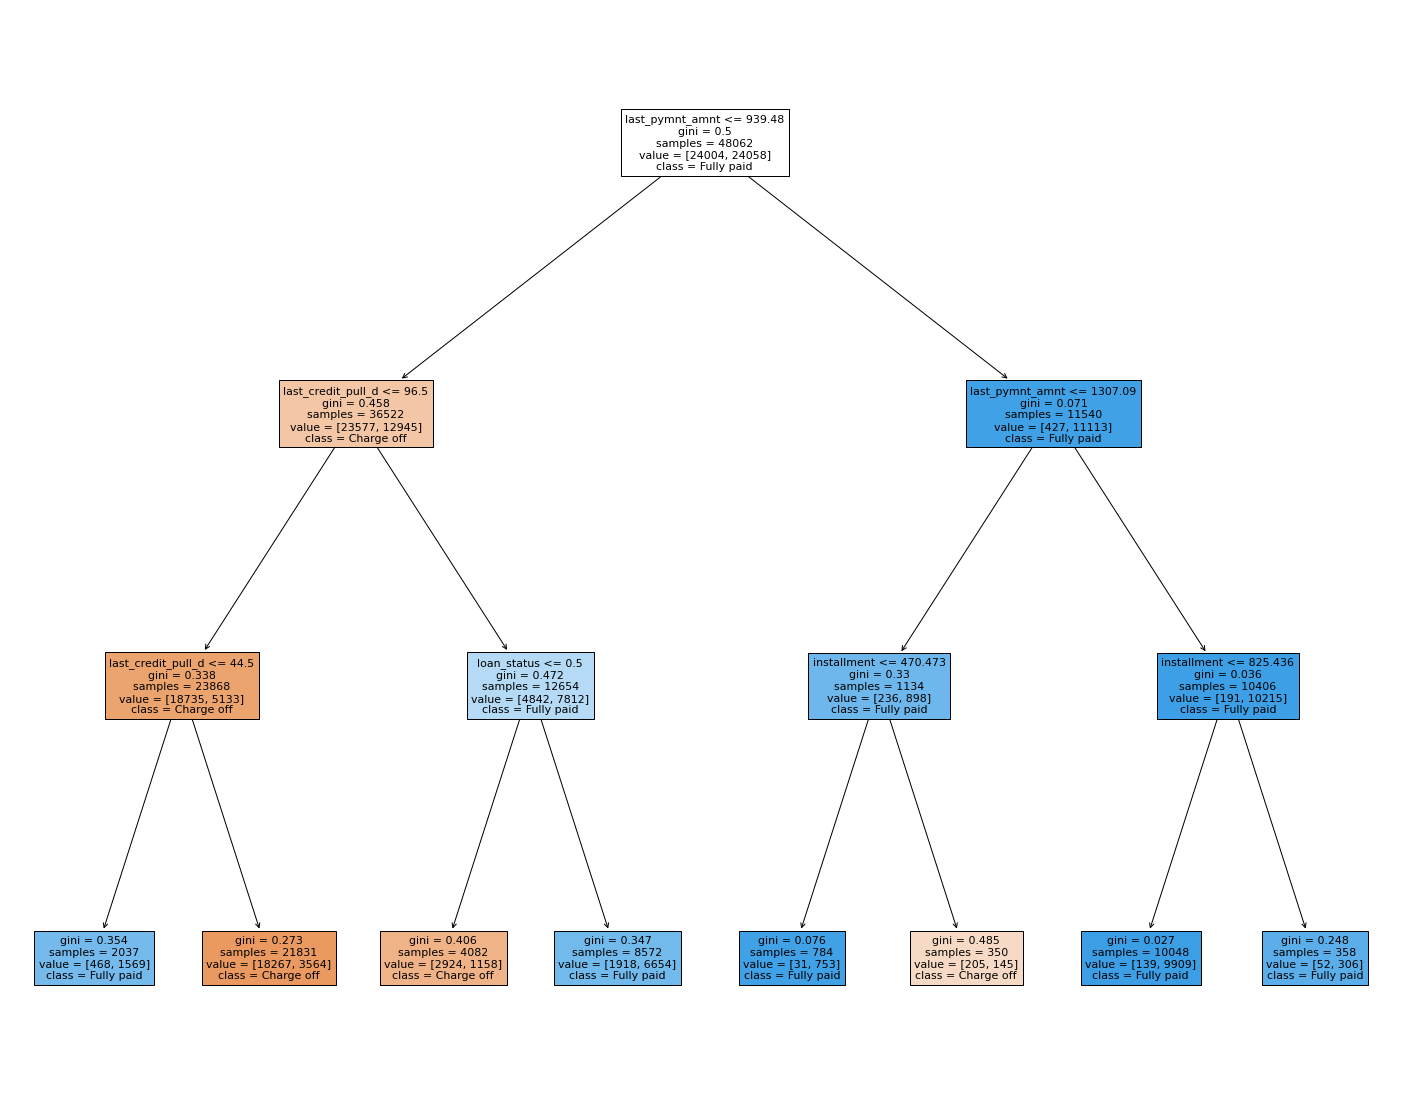

In [103]:
gph = get_dt_graph(dt_depth)

In [104]:
evaluate_model(dt_depth)

Train Accuracy : 0.8444717240231367
Train Confusion Matrix:
[[21396  2608]
 [ 4867 19191]]
--------------------------------------------------
Test Accuracy : 0.8438683367317216
Test Confusion Matrix:
[[9208 1118]
 [2098 8174]]


In [105]:
dt = DecisionTreeClassifier(random_state=42)

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# Create the parameter grid based on previous experiments 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [108]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [109]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.8s finished


Wall time: 40.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [110]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.300711,0.006764,0.019525,6.762830e-03,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780126,0.784621,0.778527,0.784353,0.781907,0.002643,41
1,0.308520,0.006765,0.015622,1.288067e-06,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780126,0.784621,0.778527,0.784353,0.781907,0.002643,41
2,0.316332,0.006765,0.015622,3.097148e-07,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780126,0.784621,0.778527,0.784353,0.781907,0.002643,41
3,0.308520,0.012953,0.015622,5.430242e-07,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780126,0.784621,0.778527,0.784353,0.781907,0.002643,41
4,0.312427,0.011047,0.015621,1.104601e-02,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.780126,0.784621,0.778527,0.784353,0.781907,0.002643,41


In [111]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
45,1.507459,0.097242,0.015621,0.000001,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.966045,0.968126,0.962464,0.973367,0.967500,0.003946,1
46,1.456091,0.094038,0.018481,0.004953,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.965213,0.967127,0.959717,0.971036,0.965773,0.004078,2
20,1.586905,0.058559,0.017286,0.001664,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.964464,0.961967,0.963546,0.960549,0.962632,0.001498,3
47,1.486737,0.108439,0.019526,0.006765,entropy,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.961718,0.961135,0.958885,0.967374,0.962278,0.003127,4
21,1.599160,0.039005,0.014893,0.004794,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.964464,0.958638,0.962214,0.962214,0.961883,0.002086,5


In [112]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [113]:
dt_best = grid_search.best_estimator_

In [114]:
evaluate_model(dt_best)

Train Accuracy : 0.9905746743789272
Train Confusion Matrix:
[[23766   238]
 [  215 23843]]
--------------------------------------------------
Test Accuracy : 0.9731527332750752
Test Confusion Matrix:
[[10067   259]
 [  294  9978]]


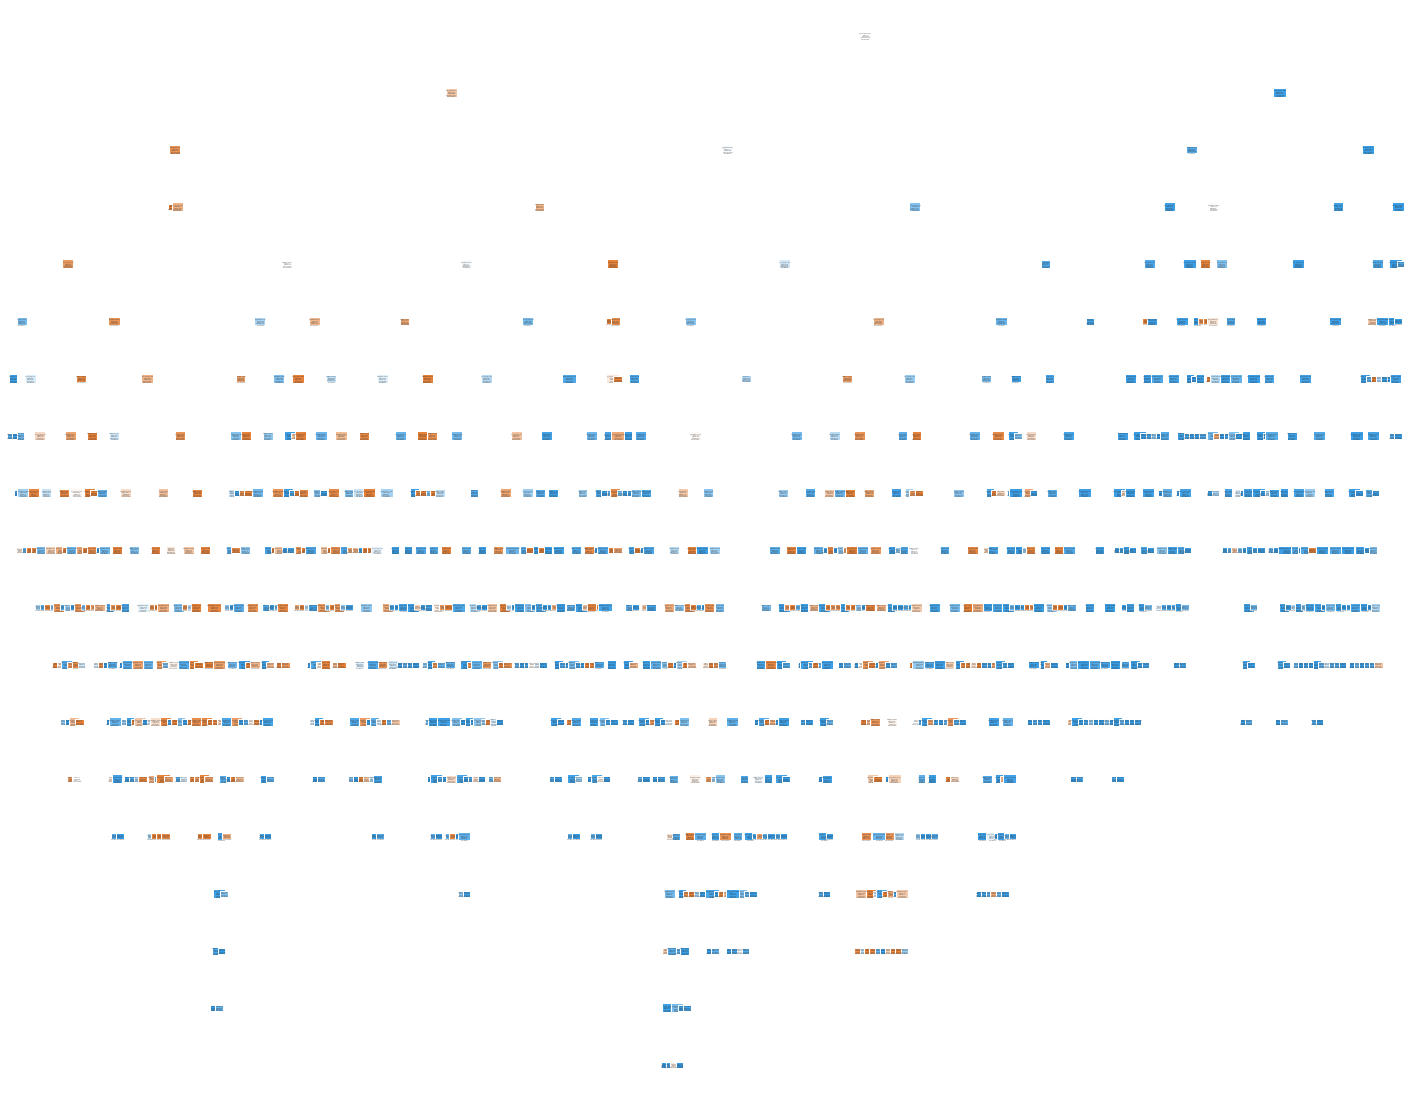

In [599]:
get_dt_graph(dt_best)

In [115]:
import seaborn as sn

Text(34.0, 0.5, 'Actual label\n')

<Figure size 2016x1440 with 0 Axes>

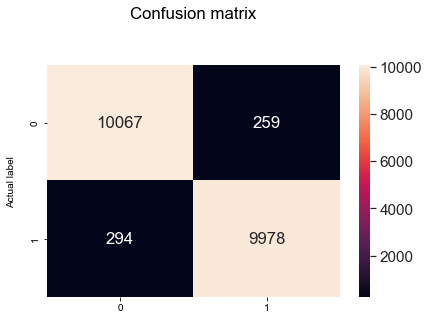

In [116]:
cm = confusion_matrix(y_test, dt_best.predict(X_test)) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')

In [103]:
# checking LG Accuracy and Precision 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression   0.93412   0.921832  0.948306  0.934882   0.94289


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(26.5, 0.5, 'Actual label\n')

<Figure size 2016x1440 with 0 Axes>

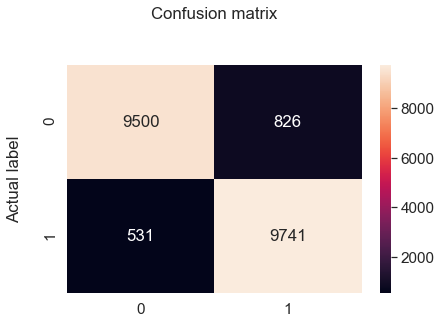

In [118]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')

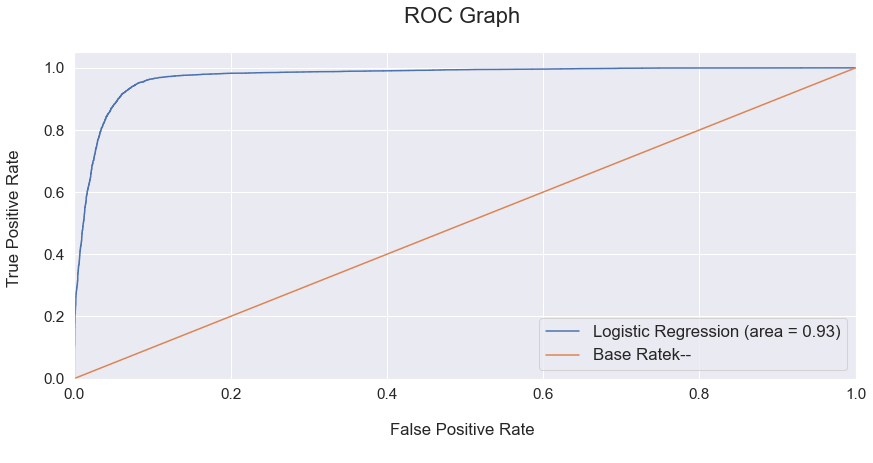

In [119]:

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [120]:
# checking the coefficient and see what was the most weighted featire 
feature_importances = pd.concat([pd.DataFrame(df.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"]) ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
21,last_credit_pull_d,7.733153e-03
19,last_pymnt_amnt,1.540031e-03
17,total_pymnt,1.011190e-03
3,grade,8.849148e-04
16,total_acc,3.353160e-04
23,loan_status,2.559797e-04
6,issue_days,2.483740e-04
12,open_acc,2.398185e-04
25,term_ 60 months,1.151893e-04
29,home_ownership_OWN,8.937094e-05


In [104]:
# use different hyperparameters for logistic regression
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 43.60 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9357468231956856, {'C': 1, 'penalty': 'l2'})

In [128]:
#Final Hyper parameter tuning and selection based on the results given above 
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2',C =1)
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

Test Data Accuracy: 0.9364


<Figure size 2016x1440 with 0 Axes>

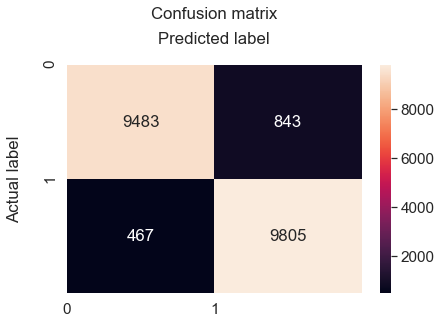

In [129]:
#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))